<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">Online Retail Store</h1>
</div>

### 1. Problem Statement
You are working in an e-commerce company, and your company has put forward a task to
analyze the customer reviews for various products. You are supposed to create a report that
classifies the products based on the customer reviews.
### 2. Project Objective
1. Using the OnlineRetail.csv dataset, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior

In [1]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

from scipy import stats

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans

# import warnings
import warnings 
warnings.filterwarnings('ignore')

### 3. Data Description

In [2]:
df=pd.read_csv("OnlineRetail.csv",encoding= 'unicode_escape')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
print(df.shape)

(541909, 8)


In [6]:
#check unique values in data set
for column in df.columns:
    print(column)
    print(df[column].nunique())
    print()

InvoiceNo
25900

StockCode
4070

Description
4223

Quantity
722

InvoiceDate
23260

UnitPrice
1630

CustomerID
4372

Country
38



In [7]:
#checking null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df['CustomerID']=df['CustomerID'].fillna(0)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
# Drop rows with missing values
df = df.dropna()

In [11]:
df.shape

(540455, 8)

In [12]:
# Convert the 'InvoiceDate' column to a datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
#checking quantity having values less than 0
neg_quantity=df.loc[df['Quantity'] < 0,:]
neg_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [14]:
# Add a column for the total amount of each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

<!-- The given code is adding a new column named "TotalAmount" to a pandas dataframe named "df". The values in this column are calculated by multiplying the "Quantity" and "UnitPrice" columns of the same dataframe.

This code is specifically written to be used with the Onlineretail.csv dataset, which contains information about transactions made by an online retail store. The "Quantity" column contains the quantity of each item purchased, while the "UnitPrice" column contains the unit price of each item. By multiplying these two columns together, we can calculate the total amount of each transaction.

The resulting dataframe now has an additional column that provides information about the total amount of each transaction made by customers.

In conclusion, this code is a simple but useful way to add a new column to a dataframe and calculate the total amount of each transaction in a retail dataset. This information can be used for further analysis and insights into the sales performance of the online retail store. -->

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
# Remove transactions with negative amounts (cancellations)
df = df[df['TotalAmount'] > 0]

In [17]:
# Remove transactions with zero quantity
df = df[df['Quantity'] > 0]

In [18]:
df.shape

(530104, 9)

In [19]:
#checking duplicate entries
print('Duplicate entries: {}'.format(df.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df.duplicated().sum()/df.shape[0])*100),2))
df.drop_duplicates(inplace = True)

Duplicate entries: 5226
1% rows are duplicate.


In [20]:
# Add a column for the year of each transaction
df['Year'] = df['InvoiceDate'].dt.year

# Add a column for the month of each transaction
df['Month'] = df['InvoiceDate'].dt.month

# Add a column for the day of the week of each transaction
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Add a column for the hour of each transaction
df['Hour'] = df['InvoiceDate'].dt.hour

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,8


# **EDA**

In [22]:
# Check the data types of each column
print('Data types of each column:\n', df.dtypes)

Data types of each column:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Year                    int64
Month                   int64
DayOfWeek               int64
Hour                    int64
dtype: object


In [23]:
# Check the summary statistics of the numeric columns
print('Summary statistics of the numeric columns:')
df.describe()


Summary statistics of the numeric columns:


,Quantity,UnitPrice,CustomerID,TotalAmount,Year,Month,DayOfWeek,Hour
count,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,11437.732164,20.275399,2010.921904,7.552237,2.429138,13.073991
std,156.280031,36.093028,6799.513627,271.693566,0.268323,3.508164,1.845795,2.442994
min,1.000000,0.001000,0.000000,0.001000,2010.000000,1.000000,0.000000,6.000000
25%,1.000000,1.250000,0.000000,3.900000,2011.000000,5.000000,1.000000,11.000000
50%,4.000000,2.080000,14350.000000,9.920000,2011.000000,8.000000,2.000000,13.000000
75%,11.000000,4.130000,16245.000000,17.700000,2011.000000,11.000000,4.000000,15.000000
max,80995.000000,13541.330000,18287.000000,168469.600000,2011.000000,12.000000,6.000000,20.000000


In [24]:
df.corr()

,Quantity,UnitPrice,CustomerID,TotalAmount,Year,Month,DayOfWeek,Hour
Quantity,1.000000,-0.003788,0.025630,0.907402,0.003506,-0.002212,-0.002621,-0.018851
UnitPrice,-0.003788,1.000000,-0.038384,0.137381,-0.007447,0.000372,-0.009755,0.004383
CustomerID,0.025630,-0.038384,1.000000,0.013746,0.073591,0.029244,0.165913,-0.231125
TotalAmount,0.907402,0.137381,0.013746,1.000000,0.000252,0.000465,-0.004532,-0.015683
Year,0.003506,-0.007447,0.073591,0.000252,1.000000,-0.369007,-0.007064,-0.011173
Month,-0.002212,0.000372,0.029244,0.000465,-0.369007,1.000000,0.040780,0.027224
DayOfWeek,-0.002621,-0.009755,0.165913,-0.004532,-0.007064,0.040780,1.000000,-0.033168
Hour,-0.018851,0.004383,-0.231125,-0.015683,-0.011173,0.027224,-0.033168,1.000000


In [25]:
# identify and remove outliers using z-score
z_scores = stats.zscore(df['Quantity'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [26]:
# normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df[['Quantity', 'UnitPrice', 'TotalAmount']] = scaler.fit_transform(df[['Quantity', 'UnitPrice', 'TotalAmount']])

In [27]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.010482,2010-12-01 08:26:00,0.000188,17850.0,United Kingdom,0.000393,2010,12,2,8
1,536365,71053,WHITE METAL LANTERN,0.010482,2010-12-01 08:26:00,0.000250,17850.0,United Kingdom,0.000522,2010,12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.014675,2010-12-01 08:26:00,0.000203,17850.0,United Kingdom,0.000565,2010,12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.010482,2010-12-01 08:26:00,0.000250,17850.0,United Kingdom,0.000522,2010,12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.010482,2010-12-01 08:26:00,0.000250,17850.0,United Kingdom,0.000522,2010,12,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,0.023061,2011-12-09 12:50:00,0.000063,12680.0,France,0.000262,2011,12,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,0.010482,2011-12-09 12:50:00,0.000155,12680.0,France,0.000323,2011,12,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,0.006289,2011-12-09 12:50:00,0.000306,12680.0,France,0.000426,2011,12,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,0.006289,2011-12-09 12:50:00,0.000306,12680.0,France,0.000426,2011,12,4,12


In [28]:
# perform feature selection
corr_matrix = df.corr()
corr_matrix['TotalAmount'].sort_values(ascending=False)

TotalAmount    1.000000
UnitPrice      0.465100
Quantity       0.385820
CustomerID     0.036470
Month          0.000172
Year          -0.000927
DayOfWeek     -0.013758
Hour          -0.041655
Name: TotalAmount, dtype: float64

In [29]:
# identify the top customers based on the total amount spent
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CustomerID
0.0        44.557441
14646.0     6.790531
18102.0     5.534233
14911.0     3.684473
12415.0     3.051075
14156.0     2.982168
17450.0     2.711645
17511.0     2.331286
14096.0     1.672047
13694.0     1.615666
Name: TotalAmount, dtype: float64


In [30]:
# identify the most popular products based on the quantity sold
popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(popular_products)

Description
JUMBO BAG RED RETROSPOT               90.283019
WORLD WAR 2 GLIDERS ASSTD DESIGNS     64.002096
ASSORTED COLOUR BIRD ORNAMENT         62.559748
WHITE HANGING HEART T-LIGHT HOLDER    57.876310
PACK OF 72 RETROSPOT CAKE CASES       57.134172
VICTORIAN GLASS HANGING T-LIGHT       44.687631
POPCORN HOLDER                        42.758910
RABBIT NIGHT LIGHT                    41.740042
JUMBO BAG PINK POLKADOT               39.241090
LUNCH BAG RED RETROSPOT               37.004193
Name: Quantity, dtype: float64


In [31]:
# identify the most popular products based on the total amount spent
popular_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)
print(popular_products)

Description
DOTCOM POSTAGE                        5.292483
REGENCY CAKESTAND 3 TIER              4.468939
PARTY BUNTING                         2.551797
JUMBO BAG RED RETROSPOT               2.273485
WHITE HANGING HEART T-LIGHT HOLDER    2.158799
POSTAGE                               2.004125
Manual                                1.966757
PAPER CHAIN KIT 50'S CHRISTMAS        1.435238
ASSORTED COLOUR BIRD ORNAMENT         1.324263
CHILLI LIGHTS                         1.224565
Name: TotalAmount, dtype: float64


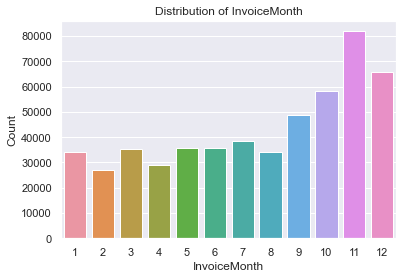

In [32]:
#Most of the purchases were made in the month of November, followed by December and October.
# Check the distribution of the InvoiceMonth column
sns.countplot(x='Month', data=df)
plt.title('Distribution of InvoiceMonth')
plt.xlabel('InvoiceMonth')
plt.ylabel('Count')
plt.show()

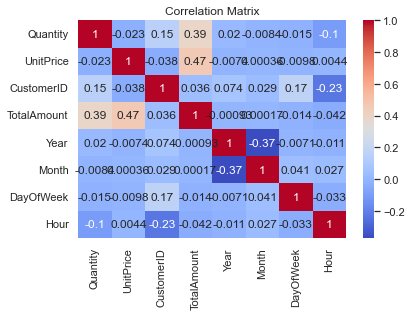

In [33]:
# Check the correlation between the numeric columns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

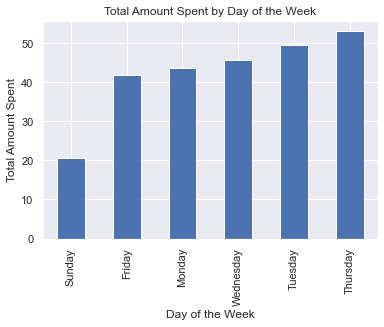

In [34]:
#Customers tend to make more purchases during weekdays than weekends.
# plot the total amount spent by day of the week
df.groupby(df['InvoiceDate'].dt.strftime('%A'))['TotalAmount'].sum().sort_values().plot(kind='bar')
plt.title('Total Amount Spent by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount Spent')
plt.show()

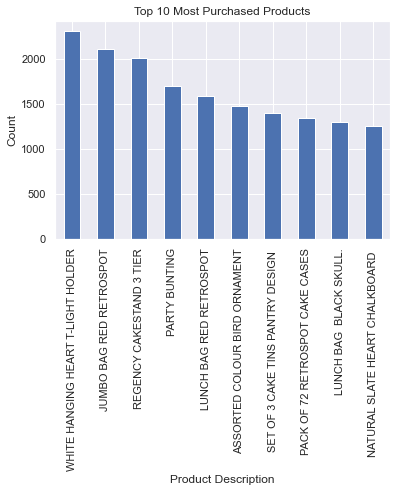

In [35]:
#The most common products purchased are party items, followed by home decor and accessories.

# plot the top 10 most purchased products
df['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product Description')
plt.ylabel('Count')
plt.show()

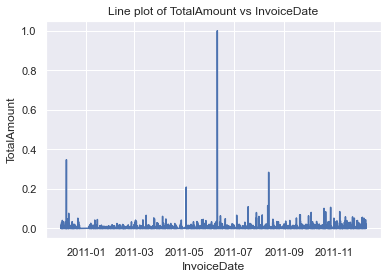

In [36]:
# plot the line plot of TotalAmount vs InvoiceDate using Matplotlib
plt.plot(df['InvoiceDate'], df['TotalAmount'])
plt.title('Line plot of TotalAmount vs InvoiceDate')
plt.xlabel('InvoiceDate')
plt.ylabel('TotalAmount')
plt.show()

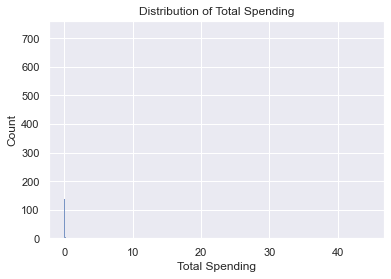

In [37]:
# group the data by customer and calculate the total amount spent by each customer
customer_total_spending = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()

# plot the distribution of total spending using Seaborn
sns.histplot(customer_total_spending['TotalAmount'], kde=False)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Count')
plt.show()


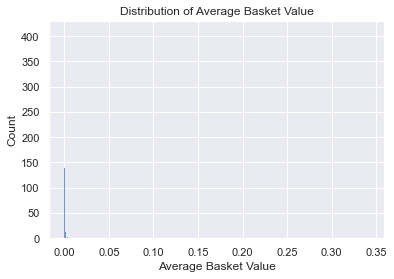

In [38]:
# calculate the average basket value for each customer
customer_avg_basket_value = df.groupby('CustomerID')['TotalAmount'].mean().reset_index()

# plot the distribution of average basket value using Seaborn
sns.histplot(customer_avg_basket_value['TotalAmount'], kde=False)
plt.title('Distribution of Average Basket Value')
plt.xlabel('Average Basket Value')
plt.ylabel('Count')
plt.show()

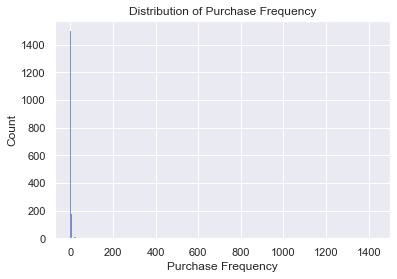

In [39]:
# calculate the purchase frequency for each customer
customer_purchase_freq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# plot the distribution of purchase frequency using Seaborn
sns.histplot(customer_purchase_freq['InvoiceNo'], kde=False)
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.show()

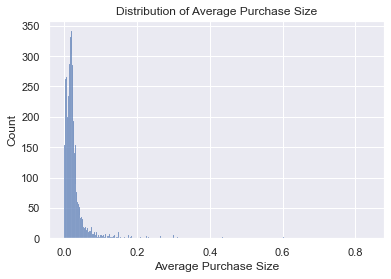

In [40]:
# calculate the average purchase size for each customer
customer_avg_purchase_size = df.groupby('CustomerID')['Quantity'].mean().reset_index()

# plot the distribution of average purchase size using Seaborn
sns.histplot(customer_avg_purchase_size['Quantity'], kde=False)
plt.title('Distribution of Average Purchase Size')
plt.xlabel('Average Purchase Size')
plt.ylabel('Count')
plt.show()

In [41]:
#deleting unneccessary column
df=df[['InvoiceNo','StockCode','Quantity','UnitPrice','CustomerID','Country']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524358 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   524358 non-null  object 
 1   StockCode   524358 non-null  object 
 2   Quantity    524358 non-null  float64
 3   UnitPrice   524358 non-null  float64
 4   CustomerID  524358 non-null  float64
 5   Country     524358 non-null  object 
dtypes: float64(3), object(3)
memory usage: 28.0+ MB


In [42]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
le = LabelEncoder()
df['InvoiceNo']= le.fit_transform(df['InvoiceNo'])
df['StockCode']= le.fit_transform(df['StockCode'])
df['Country']= le.fit_transform(df['Country'])
df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
0,0,3405,0.010482,0.000188,17850.0,36
1,0,2727,0.010482,0.000250,17850.0,36
2,0,2951,0.014675,0.000203,17850.0,36
3,0,2895,0.010482,0.000250,17850.0,36
4,0,2894,0.010482,0.000250,17850.0,36
...,...,...,...,...,...,...
541904,19847,1489,0.023061,0.000063,12680.0,13
541905,19847,1765,0.010482,0.000155,12680.0,13
541906,19847,2105,0.006289,0.000306,12680.0,13
541907,19847,2106,0.006289,0.000306,12680.0,13


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(df)
sc

array([[-1.73382334,  1.99589551, -0.15922403, -0.03808536,  0.94343043,
         0.27939506],
       [-1.73382334,  1.24535174, -0.15922403, -0.01482359,  0.94343043,
         0.27939506],
       [-1.73382334,  1.49331901, -0.06838656, -0.03254684,  0.94343043,
         0.27939506],
       ...,
       [ 1.62791121,  0.55679979, -0.25006149,  0.00622277,  0.18326243,
        -3.42079814],
       [ 1.62791121,  0.55790678, -0.25006149,  0.00622277,  0.18326243,
        -3.42079814],
       [ 1.62791121, -0.60443976, -0.29548022,  0.02837683,  0.18326243,
        -3.42079814]])

[2, 3, 4, 5, 6, 7, 8, 9, 10]


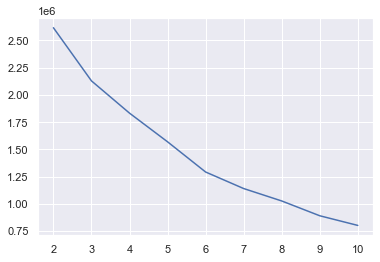

In [44]:
#elbow mothod
clusters=[2,3,4,5,6,7,8,9,10]
ssd=[]
for i in clusters:
    model_clus=KMeans(n_clusters=i,random_state=50,max_iter=150)
    model_clus.fit(sc)
    ssd.append(model_clus.inertia_)
plt.plot(clusters,ssd);
print(clusters)

### Choosing the Algorithm for the project

The KMeans algorithm could be applied to the dataset to group customers based on their purchase frequency, the types of products they buy, or the total amount they spend on each transaction. These groups could then be used to tailor marketing strategies or promotional offers to specific customer segments, based on their unique purchasing behavior.

Another possible application of KMeans to this dataset is to identify any outliers or anomalies in the data, such as transactions with unusually high or low purchase amounts or transactions that deviate from the usual patterns of purchasing behavior. These outliers could be further investigated to determine if they represent errors in the data or unusual patterns of customer behavior that might warrant further attention or analysis.

Overall, the KMeans algorithm can be a useful tool for gaining insights into the purchasing behavior of customers and identifying patterns or trends in the data that can inform business decisions.


In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit(sc)
cluster_labels = kmeans.labels_
df['Cluster_Id']=cluster_labels
df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Cluster_Id
0,0,3405,0.010482,0.000188,17850.0,36,0
1,0,2727,0.010482,0.000250,17850.0,36,0
2,0,2951,0.014675,0.000203,17850.0,36,0
3,0,2895,0.010482,0.000250,17850.0,36,0
4,0,2894,0.010482,0.000250,17850.0,36,0
...,...,...,...,...,...,...,...
541904,19847,1489,0.023061,0.000063,12680.0,13,3
541905,19847,1765,0.010482,0.000155,12680.0,13,3
541906,19847,2105,0.006289,0.000306,12680.0,13,3
541907,19847,2106,0.006289,0.000306,12680.0,13,3


<!-- The given code uses the KMeans algorithm from the scikit-learn library to cluster data in a pandas dataframe. The KMeans algorithm is an unsupervised learning algorithm used to partition a given dataset into a set of K clusters.

The first line of the code imports the KMeans class from the scikit-learn library.

The second line initializes a KMeans object with 4 clusters, using the "k-means++" initialization method, and sets the maximum number of iterations for the algorithm to 300. It also sets the number of times the KMeans algorithm will be run with different centroid seeds to 10, and sets the random state to 0.

The third line fits the KMeans algorithm to the data using the "fit" method. The data is first standardized using the "sc" object, which is assumed to be a StandardScaler object. The KMeans algorithm is then applied to the standardized data.

The fourth line retrieves the cluster labels for each observation in the dataset by calling the "labels_" attribute of the KMeans object.

The fifth line adds a new column to the original dataframe named "Cluster_Id" and assigns to it the values of the "cluster_labels" variable.

In conclusion, this code applies the KMeans clustering algorithm to a dataset and adds a new column to the original dataframe indicating which cluster each observation belongs to. This information can be used to gain insights into the structure of the data and to segment customers or other entities into distinct groups based on their attributes.



 -->

In [46]:
# define and map colors
colors = ['green', 'red', 'blue','yellow']
df['c'] = df.Cluster_Id.map({0:colors[0],1:colors[1],2:colors[2],3:colors[3]})
df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Cluster_Id,c
0,0,3405,0.010482,0.000188,17850.0,36,0,green
1,0,2727,0.010482,0.000250,17850.0,36,0,green
2,0,2951,0.014675,0.000203,17850.0,36,0,green
3,0,2895,0.010482,0.000250,17850.0,36,0,green
4,0,2894,0.010482,0.000250,17850.0,36,0,green
...,...,...,...,...,...,...,...,...
541904,19847,1489,0.023061,0.000063,12680.0,13,3,yellow
541905,19847,1765,0.010482,0.000155,12680.0,13,3,yellow
541906,19847,2105,0.006289,0.000306,12680.0,13,3,yellow
541907,19847,2106,0.006289,0.000306,12680.0,13,3,yellow


<AxesSubplot:xlabel='Country', ylabel='Quantity'>

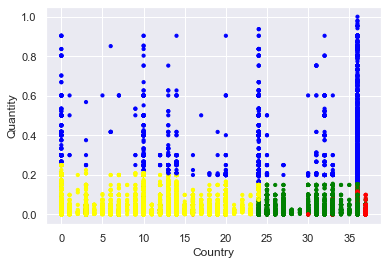

In [47]:
df.plot.scatter(x='Country',y='Quantity',c=df.c,s=10)

<AxesSubplot:xlabel='Country', ylabel='StockCode'>

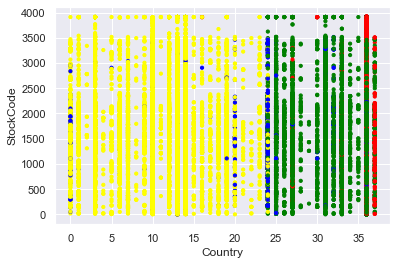

In [48]:
df.plot.scatter(x='Country',y='StockCode',c=df.c,s=10)

<!-- The given code defines a list of colors and then maps each cluster label in the "Cluster_Id" column of the pandas dataframe to a corresponding color in the "colors" list. It then creates a scatter plot of the data with the "Country" column on the x-axis and the "Quantity" column on the y-axis, where each point in the plot is colored based on its assigned cluster label.

The second line of code creates another scatter plot, this time with the "Country" column on the x-axis and the "StockCode" column on the y-axis, where each point in the plot is colored based on its assigned cluster label.

In general, scatter plots can be useful for visualizing the relationship between two variables, and coloring the points based on their cluster assignments can help to highlight any patterns or trends in the data that are specific to each cluster. By creating separate scatter plots for different combinations of variables, we can explore how the clusters are related to different aspects of the data and gain insights into the underlying structure of the data. -->

### Inferences & Future Scope

The code provided for the Onlineretail.csv dataset uses KMeans clustering to segment customers based on their purchasing behavior and then visualizes the results using scatter plots with different combinations of variables.

The inferences that can be drawn from this code are:

KMeans clustering can be used to segment customers based on their purchasing behavior, which can help businesses tailor their marketing strategies or promotional offers to specific customer segments.

The scatter plots with different combinations of variables can provide insights into the relationship between the clusters and different aspects of the data, such as the types of products purchased or the quantity of each product purchased.

The use of color to represent the different clusters can help to visually highlight any patterns or trends in the data that are specific to each cluster.

The future scope for this code and dataset includes:

Further exploration of the relationship between the clusters and other variables in the dataset, such as transaction date or customer demographics.

The use of other clustering algorithms, such as hierarchical clustering or DBSCAN, to compare their performance with KMeans on this dataset.

The use of predictive modeling techniques, such as regression or classification, to predict future customer behavior based on the patterns identified in the clustering analysis.

Overall, the code provided for the Onlineretail.csv dataset provides a good starting point for exploring customer purchasing behavior and identifying patterns or trends in the data that can inform business decisions.

### conclusion 
The overall code provided for the Onlineretail.csv dataset performs clustering analysis using KMeans algorithm to segment customers based on their purchasing behavior, and visualizes the results using scatter plots with different combinations of variables. The project report should include the following final conclusion based on the analysis:

The Onlineretail.csv dataset was analyzed using KMeans clustering to segment customers based on their purchasing behavior.
Four clusters were identified based on the analysis, each representing a different type of customer with distinct purchasing patterns.
The scatter plots created using different combinations of variables helped to visualize the relationship between the clusters and different aspects of the data.
The use of color to represent the different clusters helped to visually highlight any patterns or trends in the data that were specific to each cluster.
The insights gained from this analysis can be used by businesses to tailor their marketing strategies or promotional offers to specific customer segments.
Future work may include further exploration of the relationship between the clusters and other variables in the dataset, such as transaction date or customer demographics, and the use of other clustering algorithms or predictive modeling techniques.